In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


plt.rcParams['text.color'] = 'black'

from sklearn.metrics.cluster import homogeneity_score

In [2]:
df = pd.read_csv('Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv')

In [3]:
df.head(2)

CATEGORÍA_Alimentos y Bebidas  CATEGORÍA_Almacenamiento y empaques  \
0                            0.0                                  0.0   
1                            0.0                                  0.0   

   CATEGORÍA_Aseo, Cafetería y Oficina  \
0                                  0.0   
1                                  0.0   

   CATEGORÍA_Dotación y elementos de protección personal  \
0                                                0.0       
1                                                0.0       

   CATEGORÍA_Ferreteria  CATEGORÍA_Otros  CATEGORÍA_Vehículos y repuestos  \
0                   0.0              1.0                              0.0   
1                   0.0              1.0                              0.0   

   CATEGORÍA_Vigilancia y seguridad industrial  \
0                                          0.0   
1                                          0.0   

   SUBCATEGORÍA_Alimentos preparados y conservados  \
0                                              0.0   
1                                              0.0   

   SUBCATEGORÍA_Elementos de aseo y limpieza  ...  NÚMERO_PEDIDO  \
0                                        0.0  ...       0.596922   
1                                        0.0  ...       0.017058   

   ORDEN_NÚMERO  CANTIDAD_PEDIDA  CANTIDAD_RECIBIDA  PRECIO_UNITARIO  \
0      0.031098     2.408839e-05       0.000000e+00         0.281401   
1      0.000888     3.441947e-07       3.441947e-07         0.508366   

   PRECIO_UNITARIO_+_IVA       IVA  TOTAL_+_IVA  DURACIÓN_ENTREGA  \
0               0.334865  0.053464     0.669729      0.000000e+00   
1               0.604956  0.096590     0.604956      3.441947e-07   

   DURACIÓN_APROBACIÓN  
0                  0.0  
1                  0.0  

[2 rows x 43 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22392 entries, 0 to 22391
Data columns (total 43 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   CATEGORÍA_Alimentos y Bebidas                          22392 non-null  float64
 1   CATEGORÍA_Almacenamiento y empaques                    22392 non-null  float64
 2   CATEGORÍA_Aseo, Cafetería y Oficina                    22392 non-null  float64
 3   CATEGORÍA_Dotación y elementos de protección personal  22392 non-null  float64
 4   CATEGORÍA_Ferreteria                                   22392 non-null  float64
 5   CATEGORÍA_Otros                                        22392 non-null  float64
 6   CATEGORÍA_Vehículos y repuestos                        22392 non-null  float64
 7   CATEGORÍA_Vigilancia y seguridad industrial            22392 non-null  float64
 8   SUBCATEGORÍA_Alimentos preparados y conservado

## DROP SOME COLUMNS

In [5]:
cols_to_drop = ['DURACIÓN_ENTREGA', 'DURACIÓN_APROBACIÓN', 'PRECIO_UNITARIO_+_IVA', 
                'PRESUPUESTO_Otros', 'PRESUPUESTO_Presupuesto 711', 'PRESUPUESTO_Presupuesto 719', 
                'SUBCATEGORÍA_Alimentos preparados y conservados', 'SUBCATEGORÍA_Elementos de aseo y limpieza', 'SUBCATEGORÍA_Otros'
                
               ]

In [6]:
cols_to_drop

['DURACIÓN_ENTREGA',
 'DURACIÓN_APROBACIÓN',
 'PRECIO_UNITARIO_+_IVA',
 'PRESUPUESTO_Otros',
 'PRESUPUESTO_Presupuesto 711',
 'PRESUPUESTO_Presupuesto 719',
 'SUBCATEGORÍA_Alimentos preparados y conservados',
 'SUBCATEGORÍA_Elementos de aseo y limpieza',
 'SUBCATEGORÍA_Otros']

In [7]:
df.drop(cols_to_drop, inplace=True, axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22392 entries, 0 to 22391
Data columns (total 34 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   CATEGORÍA_Alimentos y Bebidas                          22392 non-null  float64
 1   CATEGORÍA_Almacenamiento y empaques                    22392 non-null  float64
 2   CATEGORÍA_Aseo, Cafetería y Oficina                    22392 non-null  float64
 3   CATEGORÍA_Dotación y elementos de protección personal  22392 non-null  float64
 4   CATEGORÍA_Ferreteria                                   22392 non-null  float64
 5   CATEGORÍA_Otros                                        22392 non-null  float64
 6   CATEGORÍA_Vehículos y repuestos                        22392 non-null  float64
 7   CATEGORÍA_Vigilancia y seguridad industrial            22392 non-null  float64
 8   SUBCATEGORÍA_Seguridad y protección personal  

In [9]:
df.head(3)

CATEGORÍA_Alimentos y Bebidas  CATEGORÍA_Almacenamiento y empaques  \
0                            0.0                                  0.0   
1                            0.0                                  0.0   
2                            1.0                                  0.0   

   CATEGORÍA_Aseo, Cafetería y Oficina  \
0                                  0.0   
1                                  0.0   
2                                  0.0   

   CATEGORÍA_Dotación y elementos de protección personal  \
0                                                0.0       
1                                                0.0       
2                                                0.0       

   CATEGORÍA_Ferreteria  CATEGORÍA_Otros  CATEGORÍA_Vehículos y repuestos  \
0                   0.0              1.0                              0.0   
1                   0.0              1.0                              0.0   
2                   0.0              0.0                              0.0   

   CATEGORÍA_Vigilancia y seguridad industrial  \
0                                          0.0   
1                                          0.0   
2                                          0.0   

   SUBCATEGORÍA_Seguridad y protección personal  PROVEEDOR_Otros  ...  \
0                                           0.0              1.0  ...   
1                                           0.0              1.0  ...   
2                                           0.0              1.0  ...   

   ESTADO_Pendiente por Aprobar  ESTADO_Recibido  ESTADO_Recibido Parcial  \
0                           0.0              0.0                      0.0   
1                           0.0              1.0                      0.0   
2                           0.0              0.0                      0.0   

   NÚMERO_PEDIDO  ORDEN_NÚMERO  CANTIDAD_PEDIDA  CANTIDAD_RECIBIDA  \
0       0.596922      0.031098     2.408839e-05       0.000000e+00   
1       0.017058      0.000888     3.441947e-07       3.441947e-07   
2       0.301784      0.015711     6.089387e-05       0.000000e+00   

   PRECIO_UNITARIO       IVA  TOTAL_+_IVA  
0         0.281401  0.053464     0.669729  
1         0.508366  0.096590     0.604956  
2         0.094386  0.000000     0.943855  

[3 rows x 34 columns]

# CLUSTERING

In [10]:
from sklearn import metrics
from sklearn.cluster import KMeans

## ELBOW METHOD

In [11]:
wcss = []
for i in range (1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=200)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Clustering score')

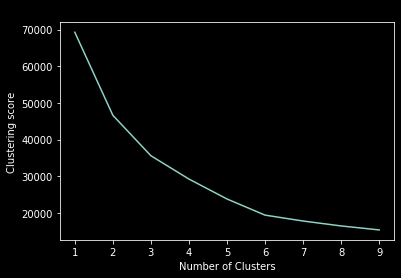

In [12]:
plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering score')

## CREATE THE CLUSTER WITH OPTIMAL N_CLUSTER

In [13]:
clustering = KMeans(n_clusters=3, max_iter=300)
clustering.fit(df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
df.head()

CATEGORÍA_Alimentos y Bebidas  CATEGORÍA_Almacenamiento y empaques  \
0                            0.0                                  0.0   
1                            0.0                                  0.0   
2                            1.0                                  0.0   
3                            1.0                                  0.0   
4                            0.0                                  0.0   

   CATEGORÍA_Aseo, Cafetería y Oficina  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

   CATEGORÍA_Dotación y elementos de protección personal  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       

   CATEGORÍA_Ferreteria  CATEGORÍA_Otros  CATEGORÍA_Vehículos y repuestos  \
0                   0.0              1.0                              0.0   
1                   0.0              1.0                              0.0   
2                   0.0              0.0                              0.0   
3                   0.0              0.0                              0.0   
4                   0.0              1.0                              0.0   

   CATEGORÍA_Vigilancia y seguridad industrial  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   SUBCATEGORÍA_Seguridad y protección personal  PROVEEDOR_Otros  ...  \
0                                           0.0              1.0  ...   
1                                           0.0              1.0  ...   
2                                           0.0              1.0  ...   
3                                           0.0              1.0  ...   
4                                           0.0              1.0  ...   

   ESTADO_Pendiente por Aprobar  ESTADO_Recibido  ESTADO_Recibido Parcial  \
0                           0.0              0.0                      0.0   
1                           0.0              1.0                      0.0   
2                           0.0              0.0                      0.0   
3                           0.0              0.0                      0.0   
4                           0.0              1.0                      0.0   

   NÚMERO_PEDIDO  ORDEN_NÚMERO  CANTIDAD_PEDIDA  CANTIDAD_RECIBIDA  \
0       0.596922      0.031098     2.408839e-05       0.000000e+00   
1       0.017058      0.000888     3.441947e-07       3.441947e-07   
2       0.301784      0.015711     6.089387e-05       0.000000e+00   
3       0.044989      0.001718     4.539030e-05       0.000000e+00   
4       0.063367      0.000001     8.950629e-06       8.950629e-06   

   PRECIO_UNITARIO       IVA  TOTAL_+_IVA  
0         0.281401  0.053464     0.669729  
1         0.508366  0.096590     0.604956  
2         0.094386  0.000000     0.943855  
3         0.019972  0.000000     0.998587  
4         0.117744  0.022371     0.980810  

[5 rows x 34 columns]

## CLUSTER CENTERS

Data Frame of 4 clusters with normalized data

In [15]:
df_centroids = pd.DataFrame(clustering.cluster_centers_, columns=df.columns)
df_centroids

CATEGORÍA_Alimentos y Bebidas  CATEGORÍA_Almacenamiento y empaques  \
0                   7.441228e-01                         3.504571e-02   
1                   1.815215e-14                         7.285839e-16   
2                   1.301379e-02                         1.803891e-02   

   CATEGORÍA_Aseo, Cafetería y Oficina  \
0                         4.919460e-02   
1                         5.495604e-15   
2                         4.362840e-01   

   CATEGORÍA_Dotación y elementos de protección personal  \
0                                       9.653896e-02       
1                                      -7.910339e-16       
2                                       4.020101e-02       

   CATEGORÍA_Ferreteria  CATEGORÍA_Otros  CATEGORÍA_Vehículos y repuestos  \
0          1.306051e-03     6.258163e-02                     6.094906e-03   
1         -3.302913e-15    -3.816392e-15                     1.630640e-16   
2          1.002448e-01     2.801185e-01                     4.007216e-02   

   CATEGORÍA_Vigilancia y seguridad industrial  \
0                                     0.005115   
1                                     1.000000   
2                                     0.072027   

   SUBCATEGORÍA_Seguridad y protección personal  PROVEEDOR_Otros  ...  \
0                                      0.005115         0.999456  ...   
1                                      1.000000         0.000735  ...   
2                                      0.071511         0.617833  ...   

   ESTADO_Pendiente por Aprobar  ESTADO_Recibido  ESTADO_Recibido Parcial  \
0                  3.265128e-03         0.313017             1.360470e-02   
1                  2.432950e-16         1.000000             6.323067e-16   
2                  2.705837e-03         0.756732             4.896276e-03   

   NÚMERO_PEDIDO  ORDEN_NÚMERO  CANTIDAD_PEDIDA  CANTIDAD_RECIBIDA  \
0       0.214515      0.008046         0.002049           0.000069   
1       0.185118      0.002143         0.000086           0.000086   
2       0.613343      0.013515         0.000300           0.000279   

   PRECIO_UNITARIO       IVA  TOTAL_+_IVA  
0         0.106761  0.015018     0.858688  
1         0.117362  0.022292     0.904868  
2         0.192398  0.026278     0.501344  

[3 rows x 34 columns]

# DF WITH LABELS OF CLUSTER

In [16]:
df['KMeans_Cluster'] = clustering.labels_
df.sample(n=7)

CATEGORÍA_Alimentos y Bebidas  CATEGORÍA_Almacenamiento y empaques  \
15156                            0.0                                  0.0   
3690                             0.0                                  0.0   
11064                            1.0                                  0.0   
8952                             1.0                                  0.0   
19485                            1.0                                  0.0   
15430                            0.0                                  0.0   
6491                             0.0                                  0.0   

       CATEGORÍA_Aseo, Cafetería y Oficina  \
15156                                  0.0   
3690                                   1.0   
11064                                  0.0   
8952                                   0.0   
19485                                  0.0   
15430                                  0.0   
6491                                   1.0   

       CATEGORÍA_Dotación y elementos de protección personal  \
15156                                                0.0       
3690                                                 0.0       
11064                                                0.0       
8952                                                 0.0       
19485                                                0.0       
15430                                                0.0       
6491                                                 0.0       

       CATEGORÍA_Ferreteria  CATEGORÍA_Otros  CATEGORÍA_Vehículos y repuestos  \
15156                   0.0              0.0                              0.0   
3690                    0.0              0.0                              0.0   
11064                   0.0              0.0                              0.0   
8952                    0.0              0.0                              0.0   
19485                   0.0              0.0                              0.0   
15430                   0.0              0.0                              0.0   
6491                    0.0              0.0                              0.0   

       CATEGORÍA_Vigilancia y seguridad industrial  \
15156                                          1.0   
3690                                           0.0   
11064                                          0.0   
8952                                           0.0   
19485                                          0.0   
15430                                          1.0   
6491                                           0.0   

       SUBCATEGORÍA_Seguridad y protección personal  PROVEEDOR_Otros  ...  \
15156                                           1.0              0.0  ...   
3690                                            0.0              1.0  ...   
11064                                           0.0              1.0  ...   
8952                                            0.0              1.0  ...   
19485                                           0.0              1.0  ...   
15430                                           1.0              0.0  ...   
6491                                            0.0              1.0  ...   

       ESTADO_Recibido  ESTADO_Recibido Parcial  NÚMERO_PEDIDO  ORDEN_NÚMERO  \
15156              1.0                      0.0       0.172269      0.001841   
3690               0.0                      0.0       0.987573      0.032486   
11064              0.0                      0.0       0.070111      0.000655   
8952               1.0                      0.0       0.020144      0.000363   
19485              0.0                      0.0       0.069026      0.033268   
15430              1.0                      0.0       0.031874      0.000331   
6491               1.0                      0.0       0.113051      0.002951   

       CANTIDAD_PEDIDA  CANTIDAD_RECIBIDA  PRECIO_UNITARIO       IVA  \
15156         0.000020           0.000020         0.196577  0.037347   
3690          0.000021  

In [17]:
df

CATEGORÍA_Alimentos y Bebidas  CATEGORÍA_Almacenamiento y empaques  \
0                                0.0                                  0.0   
1                                0.0                                  0.0   
2                                1.0                                  0.0   
3                                1.0                                  0.0   
4                                0.0                                  0.0   
...                              ...                                  ...   
22387                            0.0                                  0.0   
22388                            0.0                                  0.0   
22389                            0.0                                  0.0   
22390                            0.0                                  0.0   
22391                            0.0                                  0.0   

       CATEGORÍA_Aseo, Cafetería y Oficina  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
...                                    ...   
22387                                  1.0   
22388                                  1.0   
22389                                  0.0   
22390                                  0.0   
22391                                  1.0   

       CATEGORÍA_Dotación y elementos de protección personal  \
0                                                    0.0       
1                                                    0.0       
2                                                    0.0       
3                                                    0.0       
4                                                    0.0       
...                                                  ...       
22387                                                0.0       
22388                                                0.0       
22389                                                0.0       
22390                                                0.0       
22391                                                0.0       

       CATEGORÍA_Ferreteria  CATEGORÍA_Otros  CATEGORÍA_Vehículos y repuestos  \
0                       0.0              1.0                              0.0   
1                       0.0              1.0                              0.0   
2                       0.0              0.0                              0.0   
3                       0.0              0.0                              0.0   
4                       0.0              1.0                              0.0   
...                     ...              ...                              ...   
22387                   0.0              0.0                              0.0   
22388                   0.0              0.0                              0.0   
22389                   0.0              1.0                              0.0   
22390                   0.0              1.0                              0.0   
22391                   0.0              0.0                              0.0   

       CATEGORÍA_Vigilancia y seguridad industrial  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
...                                            ...   
22387                                          0.0   
22388                                          0.0   
22389                                          0.0   
22390                                          0.0   
22391                                          0.0   

       SUBCATEGORÍA_Seguridad y protección personal  PROVEEDOR_Otros  ...  \
0                                               0.0          

## BRING THE ORIGINAL DF TO ADD CLUSTER LABELS

In [18]:
df_original = pd.read_excel('Proveindustriales_completo.xlsx')


In [20]:
df_original['KMeans_Cluster'] = clustering.labels_
df_original['KMeans_Cluster'] = df_original['KMeans_Cluster'].map({0:'Plata_Alim_$_medios', 1:'Oro_Vig_y_Seg_$_altos', 2:'Bronce_Aseo_$_bajos'})
df_original_plus_clusters = df_original
df_original.sample(n=7)

NÚMERO_PEDIDO  ORDEN_NÚMERO                          CATEGORÍA  \
11799          45320           186                              Otros   
15672          33137           294  Vigilancia y seguridad industrial   
18748            941            57              Vehículos y repuestos   
7147           46965          1163                Alimentos y Bebidas   
11992          45258             8          Aseo, Cafetería y Oficina   
1123           49085          2266                         Ferreteria   
20255            620           279                Alimentos y Bebidas   

                             SUBCATEGORÍA      PROVEEDOR      PRESUPUESTO  \
11799                               Otros          Otros            Otros   
15672     Seguridad y protección personal  Proveedor 301            Otros   
18748                               Otros          Otros            Otros   
7147                                Otros          Otros            Otros   
11992        Elementos de aseo y limpieza          Otros  Presupuesto 711   
1123                                Otros          Otros            Otros   
20255  Alimentos preparados y conservados          Otros  Presupuesto 711   

       COMPAÑÍA_COMPRADORA            ESTADO  CANTIDAD_PEDIDA  \
11799   Portal comprador 1         Cancelado             10.0   
15672  Portal comprador 24          Recibido            224.0   
18748                Otros  Orden en Proceso              1.0   
7147    Portal comprador 2          Recibido             12.0   
11992                Otros  Orden en Proceso              1.0   
1123    Portal comprador 1         Cancelado              1.0   
20255  Portal comprador 29  Orden en Proceso            192.0   

       CANTIDAD_RECIBIDA  PRECIO_UNITARIO  PRECIO_UNITARIO_+_IVA   IVA  \
11799                0.0             1200                   1200     0   
15672              224.0            29412                  35000  5588   
18748                0.0                0                      0     0   
7147                12.0            16667                  17500   833   
11992                0.0            36221                  43103  6882   
1123                 0.0             4110                   4891   781   
20255                0.0              387                    460    73   

       TOTAL_+_IVA FECHA_ÚLTIMO_MOVIMIENTO  DURACIÓN_ENTREGA  \
11799        12000              2020-10-14          3.000000   
15672      7840000              2020-01-24          0.000000   
18748            0              2020-06-12          3.241622   
7147        210004              2021-05-20          0.000000   
11992        43103              2020-09-02          1.000000   
1123          4891              2021-10-09          0.000000   
20255        88320              2018-09-21          3.241622   

       DURACIÓN_APROBACIÓN         KMeans_Cluster  
11799                  4.0    Bronce_Aseo_$_bajos  
15672                 50.0  Oro_Vig_y_Seg_$_altos  
18748                549.0    Plata_Alim_$_medios  
7147                   0.0    Plata_Alim_$_medios  
11992                  5.0    Plata_Alim_$_medios  
1123                   1.0    Bronce_Aseo_$_bajos  
20255                  0.0    Plata_Alim_$_medios

## DESCRIBING THE CLUSTER

In [21]:
df_original.groupby('KMeans_Cluster').agg(
    {
    'KMeans_Cluster': 'count',    
    'CATEGORÍA':  lambda x: x.value_counts().index[0],
    'SUBCATEGORÍA': lambda x: x.value_counts().index[0],
    'PROVEEDOR': lambda x: x.value_counts().index[0],
    'PRESUPUESTO': lambda x: x.value_counts().index[0],  
    'ESTADO': lambda x: x.value_counts().index[0],  
    'CANTIDAD_PEDIDA': ['mean', 'sum'],
    'CANTIDAD_RECIBIDA': ['sum','mean'],
    'PRECIO_UNITARIO': ['sum','mean'],
    'TOTAL_+_IVA': 'sum',
    'CANTIDAD_PEDIDA': 'sum'
    })

KMeans_Cluster                          CATEGORÍA  \
                               count                           <lambda>   
KMeans_Cluster                                                            
Bronce_Aseo_$_bajos             7761          Aseo, Cafetería y Oficina   
Oro_Vig_y_Seg_$_altos           5443  Vigilancia y seguridad industrial   
Plata_Alim_$_medios             9188                Alimentos y Bebidas   

                                          SUBCATEGORÍA      PROVEEDOR  \
                                              <lambda>       <lambda>   
KMeans_Cluster                                                          
Bronce_Aseo_$_bajos                              Otros          Otros   
Oro_Vig_y_Seg_$_altos  Seguridad y protección personal  Proveedor 301   
Plata_Alim_$_medios                              Otros          Otros   

                           PRESUPUESTO            ESTADO CANTIDAD_PEDIDA  \
                              <lambda>          <lambda>             sum   
KMeans_Cluster                                                             
Bronce_Aseo_$_bajos              Otros          Recibido       465666.20   
Oro_Vig_y_Seg_$_altos            Otros          Recibido       231201.00   
Plata_Alim_$_medios    Presupuesto 711  Orden en Proceso      3707180.43   

                      CANTIDAD_RECIBIDA            PRECIO_UNITARIO  \
                                    sum       mean             sum   
KMeans_Cluster                                                       
Bronce_Aseo_$_bajos           447823.30  57.701752      1172269088   
Oro_Vig_y_Seg_$_altos         231201.00  42.476759       217250633   
Plata_Alim_$_medios           429896.76  46.788938       269174584   

                                     TOTAL_+_IVA  
                                mean         sum  
KMeans_Cluster                                    
Bronce_Aseo_$_bajos    151046.139415  3238773664  
Oro_Vig_y_Seg_$_altos   39913.766857  5113057930  
Plata_Alim_$_medios     29296.319547  4014886073

In [22]:
pd.crosstab(df_original['KMeans_Cluster'], df_original['CATEGORÍA'], margins=True, normalize='index')

CATEGORÍA              Alimentos y Bebidas  Almacenamiento y empaques  \
KMeans_Cluster                                                          
Bronce_Aseo_$_bajos               0.013014                   0.018039   
Oro_Vig_y_Seg_$_altos             0.000000                   0.000000   
Plata_Alim_$_medios               0.744123                   0.035046   
All                               0.309843                   0.020632   

CATEGORÍA              Aseo, Cafetería y Oficina  \
KMeans_Cluster                                     
Bronce_Aseo_$_bajos                     0.436284   
Oro_Vig_y_Seg_$_altos                   0.000000   
Plata_Alim_$_medios                     0.049195   
All                                     0.171401   

CATEGORÍA              Dotación y elementos de protección personal  \
KMeans_Cluster                                                       
Bronce_Aseo_$_bajos                                       0.040201   
Oro_Vig_y_Seg_$_altos                                     0.000000   
Plata_Alim_$_medios                                       0.096539   
All                                                       0.053546   

CATEGORÍA              Ferreteria     Otros  Vehículos y repuestos  \
KMeans_Cluster                                                       
Bronce_Aseo_$_bajos      0.100245  0.280119               0.040072   
Oro_Vig_y_Seg_$_altos    0.000000  0.000000               0.000000   
Plata_Alim_$_medios      0.001306  0.062582               0.006095   
All                      0.035280  0.122767               0.016390   

CATEGORÍA              Vigilancia y seguridad industrial  
KMeans_Cluster                                            
Bronce_Aseo_$_bajos                             0.072027  
Oro_Vig_y_Seg_$_altos                           1.000000  
Plata_Alim_$_medios                             0.005115  
All                                             0.270141

In [23]:
df_original.columns

Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'CATEGORÍA', 'SUBCATEGORÍA',
       'PROVEEDOR', 'PRESUPUESTO', 'COMPAÑÍA_COMPRADORA', 'ESTADO',
       'CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA', 'PRECIO_UNITARIO',
       'PRECIO_UNITARIO_+_IVA', 'IVA', 'TOTAL_+_IVA',
       'FECHA_ÚLTIMO_MOVIMIENTO', 'DURACIÓN_ENTREGA', 'DURACIÓN_APROBACIÓN',
       'KMeans_Cluster'],
      dtype='object')

# STATISTICAL CLUSTER DESCRIPTION

## QUANTITY OF CLUSTERS

In [24]:
df_original['KMeans_Cluster'].value_counts()

Plata_Alim_$_medios      9188
Bronce_Aseo_$_bajos      7761
Oro_Vig_y_Seg_$_altos    5443
Name: KMeans_Cluster, dtype: int64

Text(0.5, 0, 'Cluster')

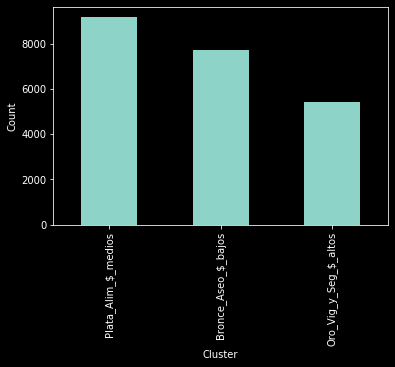

In [25]:
df_original['KMeans_Cluster'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Cluster')

## GROUPBY CLUSTERS-ESTADO

In [26]:
df_orinigal_estado = df_original.groupby('KMeans_Cluster')['ESTADO'].value_counts()
df_orinigal_estado

KMeans_Cluster         ESTADO               
Bronce_Aseo_$_bajos    Recibido                 5873
                       Finalizado Incompleto     580
                       Cancelado                 493
                       Orden Rechazada           416
                       Orden en Proceso          339
                       Recibido Parcial           38
                       Pendiente por Aprobar      21
                       Enviado                     1
Oro_Vig_y_Seg_$_altos  Recibido                 5443
Plata_Alim_$_medios    Orden en Proceso         4533
                       Recibido                 2876
                       Cancelado                 646
                       Orden Rechazada           596
                       Finalizado Incompleto     356
                       Recibido Parcial          125
                       Pendiente por Aprobar      30
                       Orden Confirmada           15
                       Enviado                    11
N

In [27]:
plt.style.use('default')

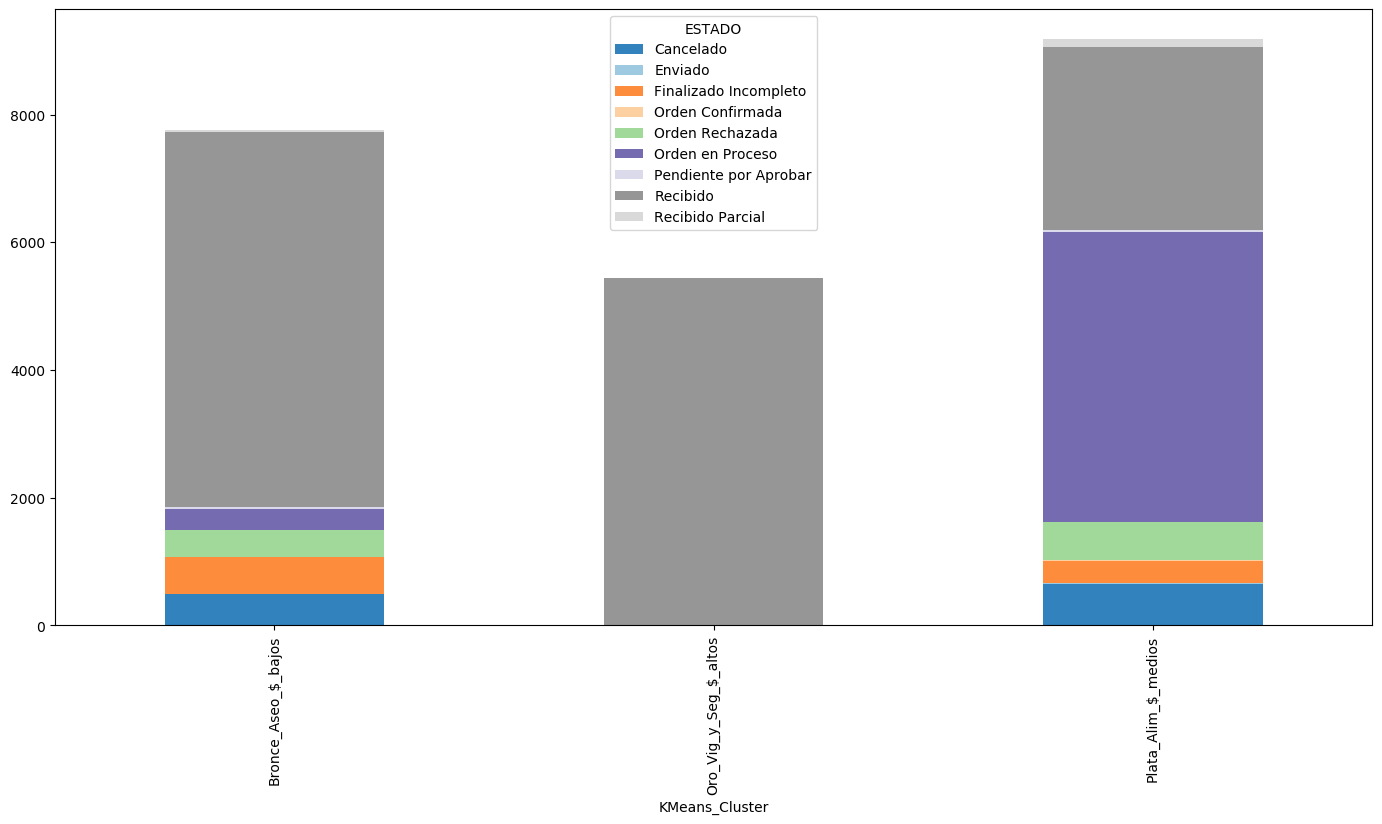

In [28]:
df_orinigal_estado.unstack().plot(kind='bar', stacked=True, figsize=(17,8),cmap=plt.get_cmap('tab20c'))

In [29]:
df_orinigal_estado1 = df_original.groupby('ESTADO')['KMeans_Cluster'].value_counts()
df_orinigal_estado1

ESTADO                 KMeans_Cluster       
Cancelado              Plata_Alim_$_medios       646
                       Bronce_Aseo_$_bajos       493
Enviado                Plata_Alim_$_medios        11
                       Bronce_Aseo_$_bajos         1
Finalizado Incompleto  Bronce_Aseo_$_bajos       580
                       Plata_Alim_$_medios       356
Orden Confirmada       Plata_Alim_$_medios        15
Orden Rechazada        Plata_Alim_$_medios       596
                       Bronce_Aseo_$_bajos       416
Orden en Proceso       Plata_Alim_$_medios      4533
                       Bronce_Aseo_$_bajos       339
Pendiente por Aprobar  Plata_Alim_$_medios        30
                       Bronce_Aseo_$_bajos        21
Recibido               Bronce_Aseo_$_bajos      5873
                       Oro_Vig_y_Seg_$_altos    5443
                       Plata_Alim_$_medios      2876
Recibido Parcial       Plata_Alim_$_medios       125
                       Bronce_Aseo_$_bajos        38
N

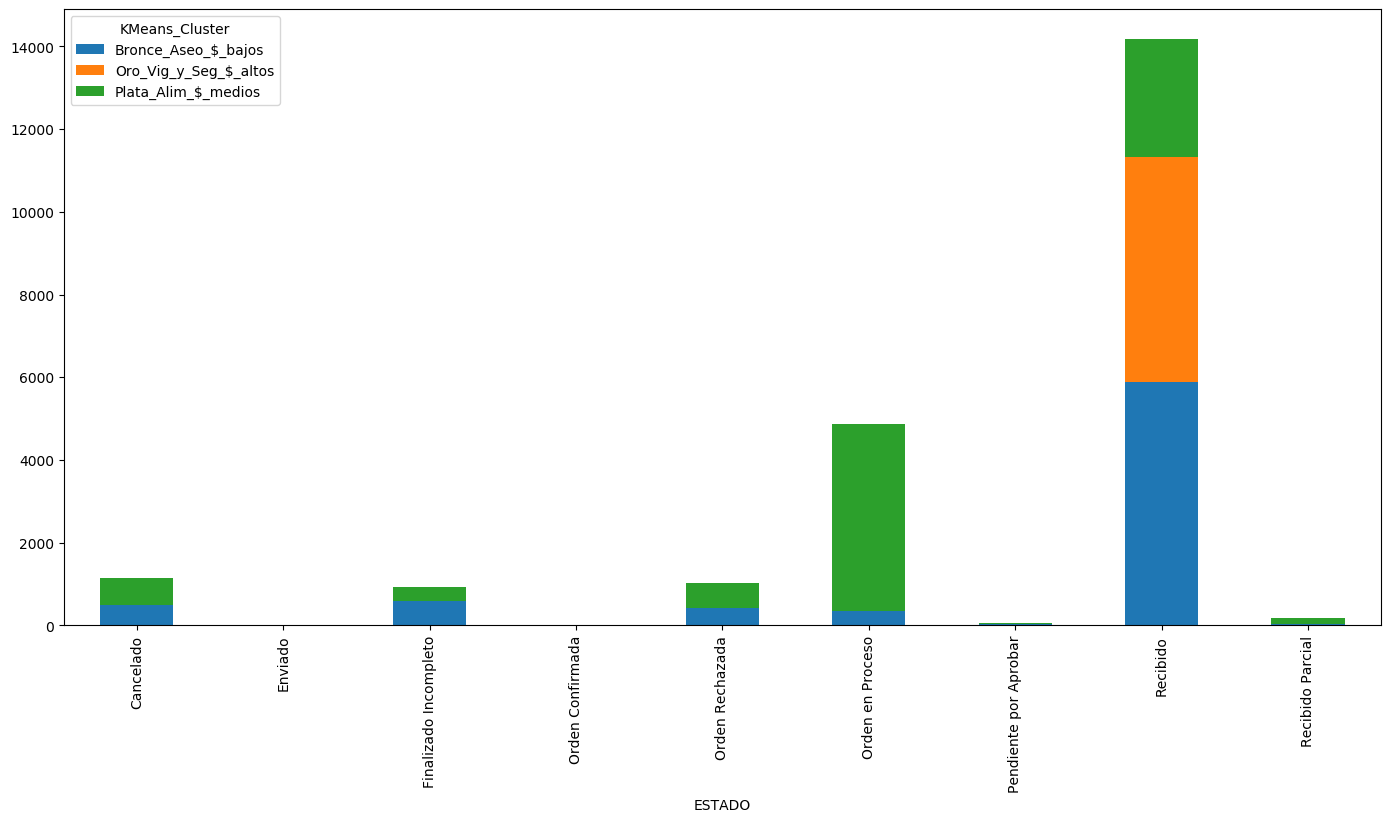

In [30]:
df_orinigal_estado1.unstack().plot(kind='bar', stacked=True, figsize=(17,8))

## GROUPBY CLUSTERS-TOTAL+IVA

In [31]:
df_original.groupby('KMeans_Cluster').agg({'TOTAL_+_IVA':['mean', 'sum']})

TOTAL_+_IVA            
                                mean         sum
KMeans_Cluster                                  
Bronce_Aseo_$_bajos    417313.962634  3238773664
Oro_Vig_y_Seg_$_altos  939382.313063  5113057930
Plata_Alim_$_medios    436970.621789  4014886073

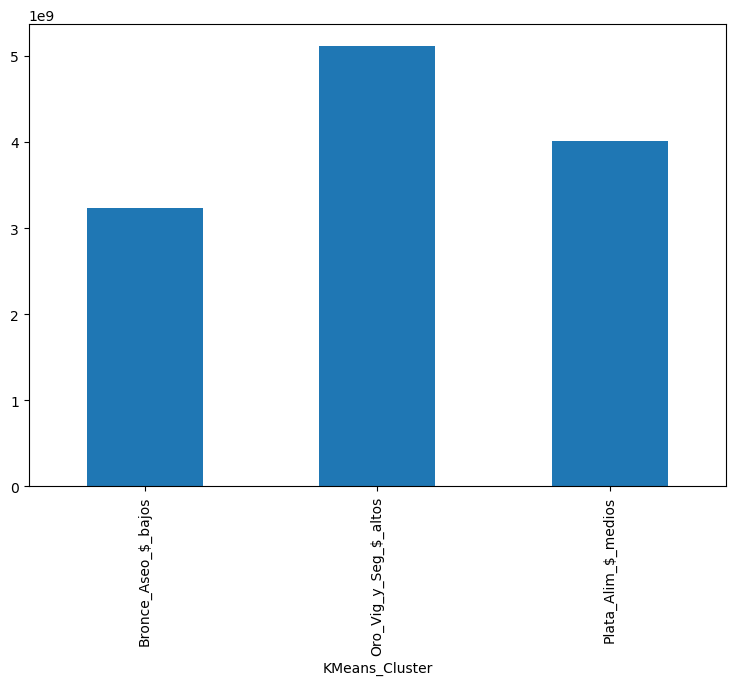

In [32]:
df_original.groupby('KMeans_Cluster')['TOTAL_+_IVA'].sum().plot(kind='bar', stacked=True, figsize=(9,6))

## GROUPBY CLUSTER-QUANTITY "PROVEEDORES"

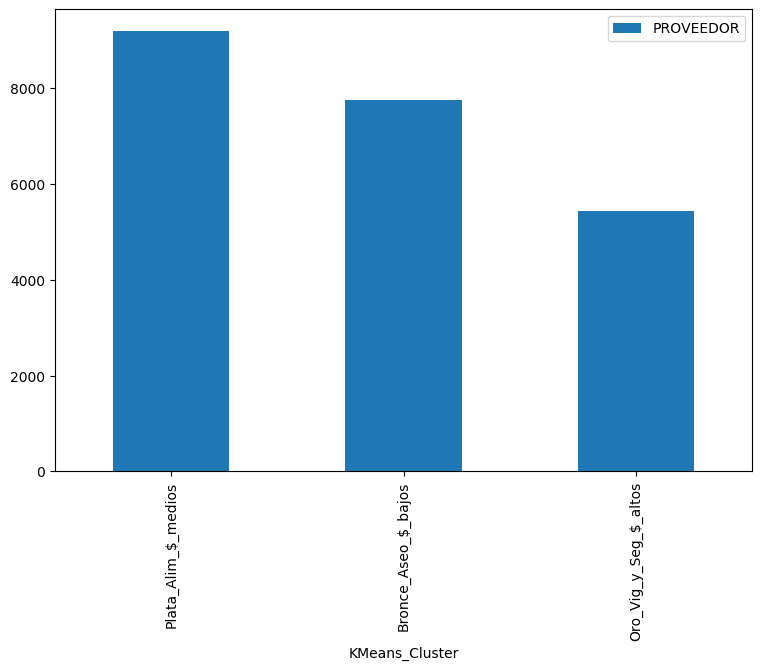

In [33]:
df_original.groupby('KMeans_Cluster').agg({'PROVEEDOR':'count'}).sort_values(by='PROVEEDOR',ascending=False).plot(kind='bar', stacked=True, figsize=(9,6))

In [34]:
df_original.columns

Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'CATEGORÍA', 'SUBCATEGORÍA',
       'PROVEEDOR', 'PRESUPUESTO', 'COMPAÑÍA_COMPRADORA', 'ESTADO',
       'CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA', 'PRECIO_UNITARIO',
       'PRECIO_UNITARIO_+_IVA', 'IVA', 'TOTAL_+_IVA',
       'FECHA_ÚLTIMO_MOVIMIENTO', 'DURACIÓN_ENTREGA', 'DURACIÓN_APROBACIÓN',
       'KMeans_Cluster'],
      dtype='object')

## GROUPBY CLUSTER-COMPANHIA COMPRADORA

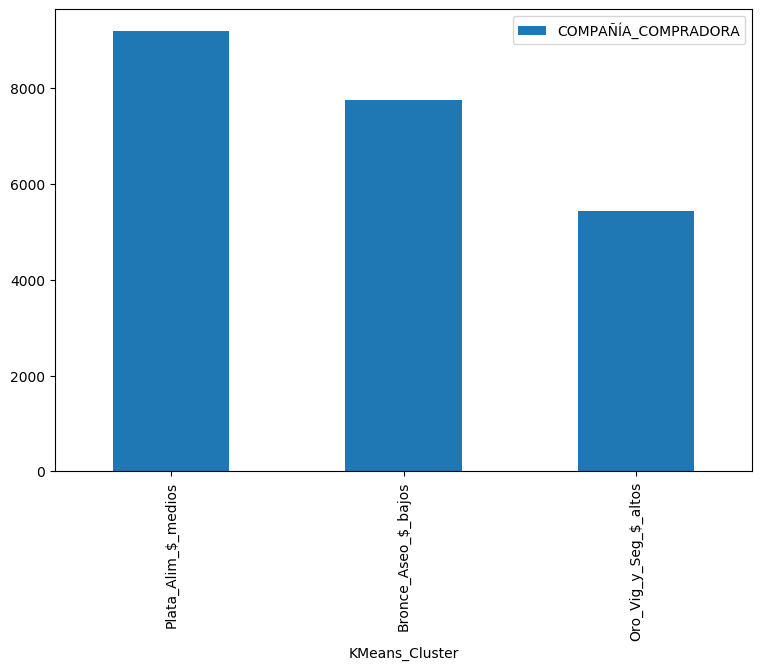

In [35]:
df_original.groupby('KMeans_Cluster').agg({'COMPAÑÍA_COMPRADORA':'count'}).sort_values(by='COMPAÑÍA_COMPRADORA',ascending=False).plot(kind='bar', stacked=True, figsize=(9,6))

In [36]:
df_original.groupby('KMeans_Cluster')['COMPAÑÍA_COMPRADORA'].value_counts().unstack()

COMPAÑÍA_COMPRADORA     Otros  Portal comprador 1  Portal comprador 2  \
KMeans_Cluster                                                          
Bronce_Aseo_$_bajos     842.0              6516.0               403.0   
Oro_Vig_y_Seg_$_altos     4.0                 NaN                 NaN   
Plata_Alim_$_medios    2361.0                47.0              3460.0   

COMPAÑÍA_COMPRADORA    Portal comprador 24  Portal comprador 29  
KMeans_Cluster                                                   
Bronce_Aseo_$_bajos                    NaN                  NaN  
Oro_Vig_y_Seg_$_altos               5439.0                  NaN  
Plata_Alim_$_medios                    NaN               3320.0

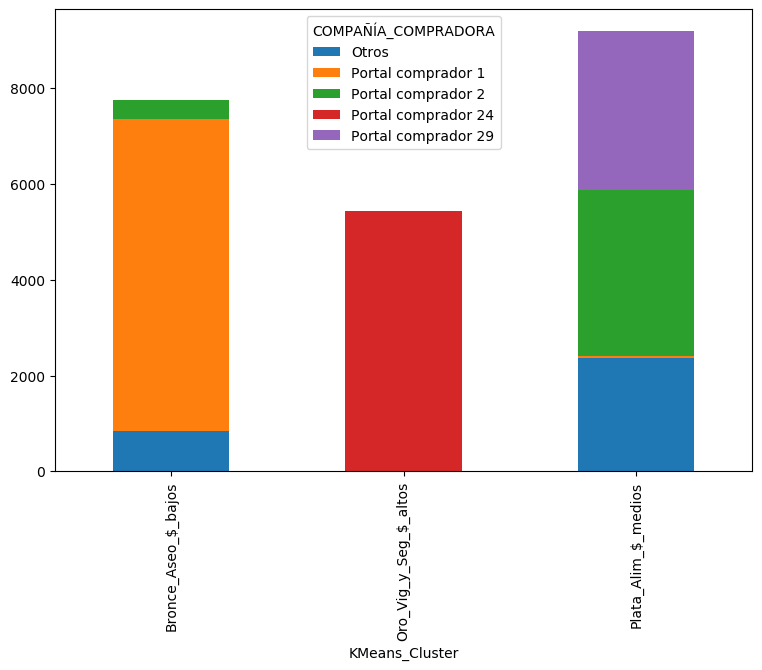

In [37]:
df_original.groupby('KMeans_Cluster')['COMPAÑÍA_COMPRADORA'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(9,6))

## GROUPBY CLUSTER-COMPANHIA PROVEEDOR

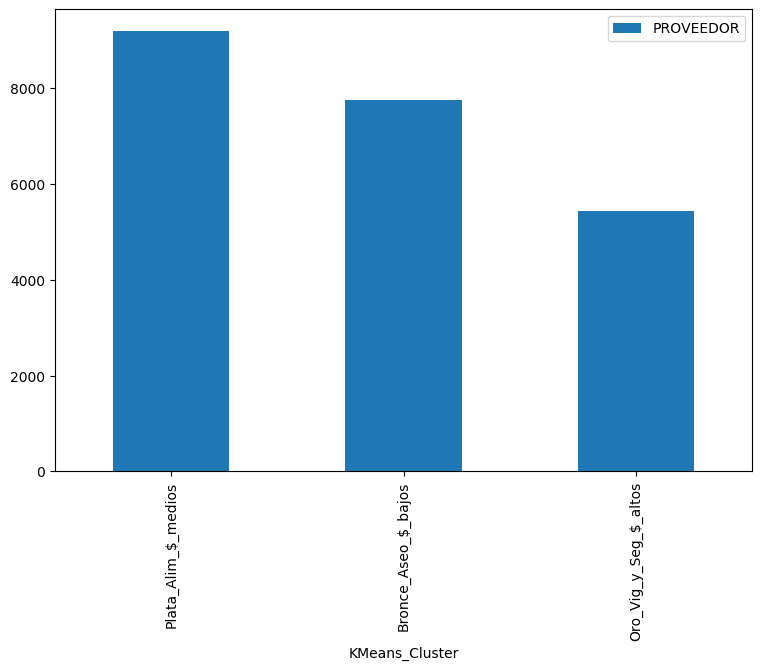

In [38]:
df_original.groupby('KMeans_Cluster').agg({'PROVEEDOR':'count'}).sort_values(by='PROVEEDOR',ascending=False).plot(kind='bar', stacked=True, figsize=(9,6))

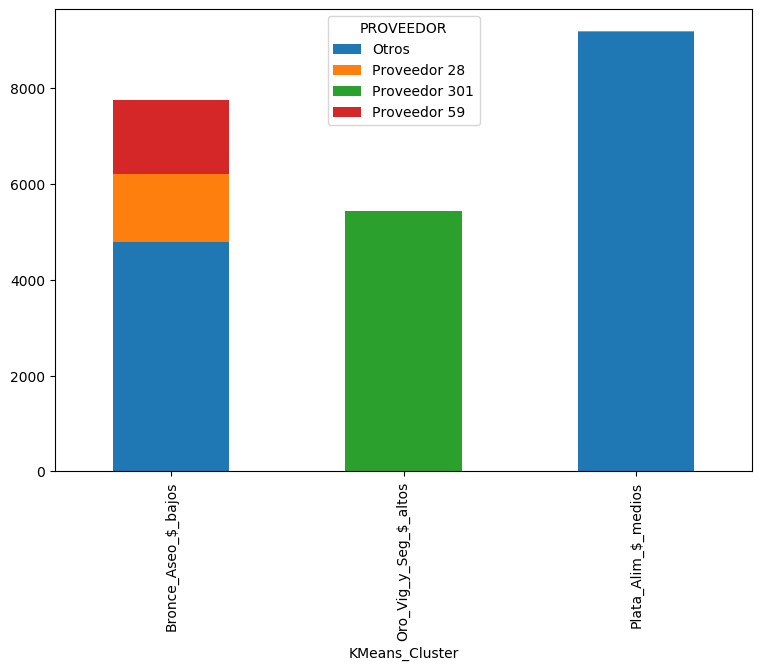

In [39]:
df_original.groupby('KMeans_Cluster')['PROVEEDOR'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(9,6))

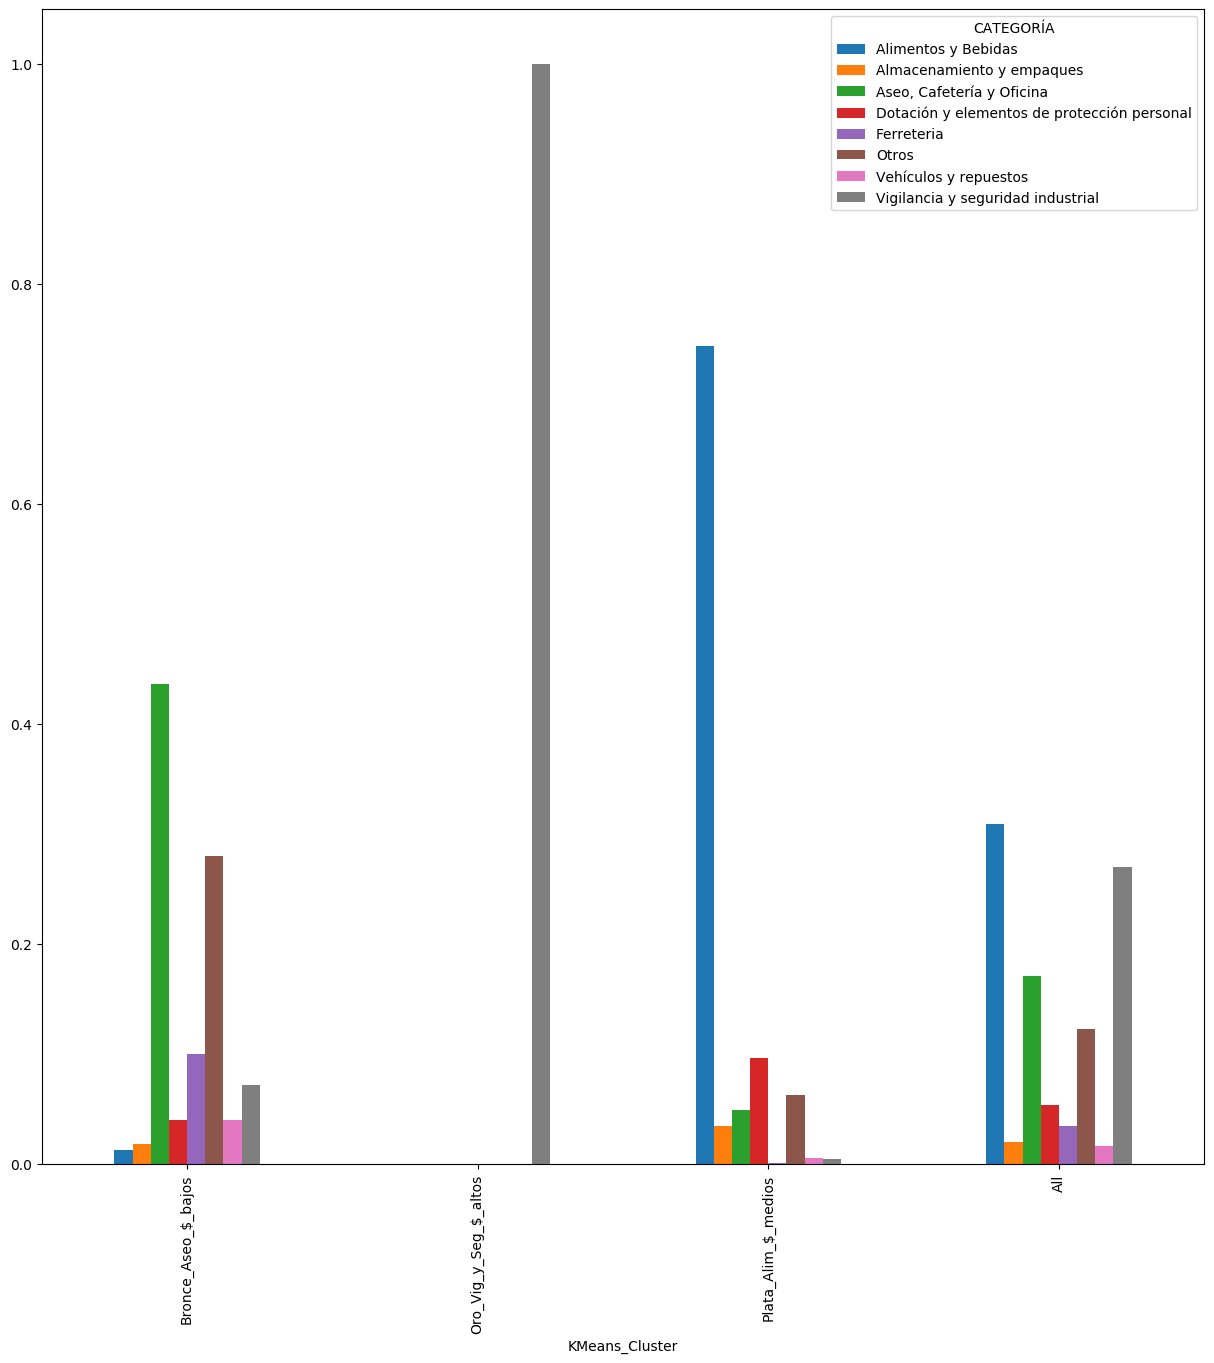

In [40]:
pd.crosstab(df_original['KMeans_Cluster'], df_original['CATEGORÍA'], margins=True, normalize='index').plot(kind='bar', figsize=(15,15), )

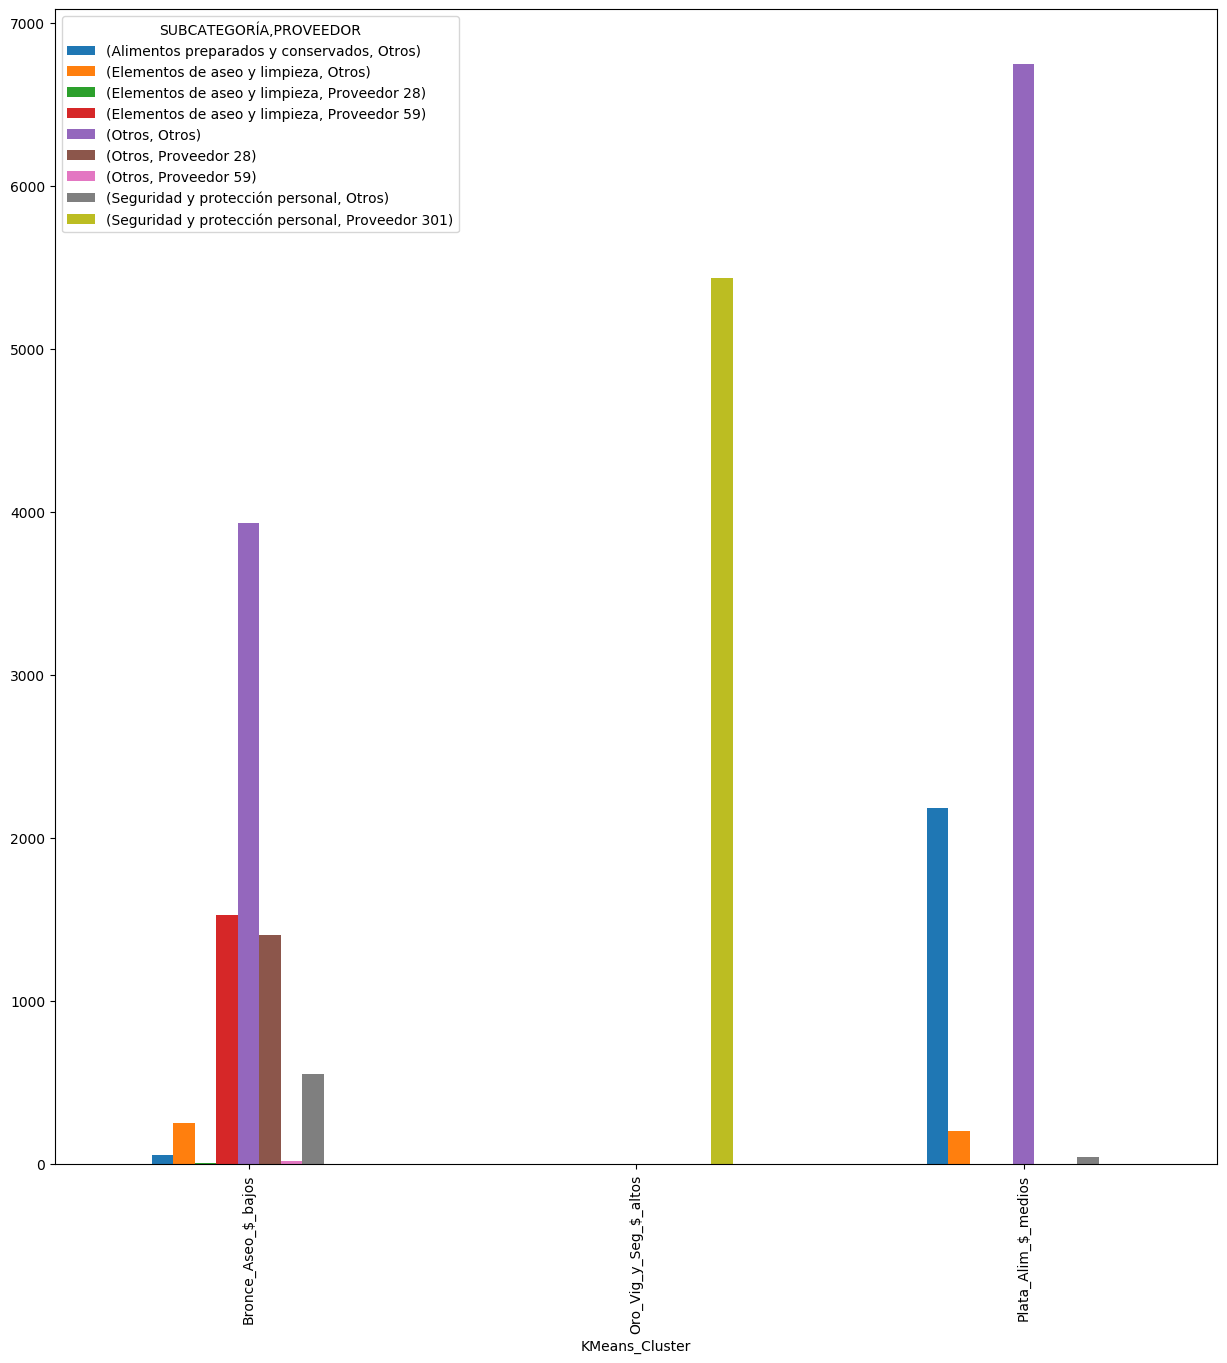

In [41]:
pd.crosstab(df_original['KMeans_Cluster'], [df_original['SUBCATEGORÍA'] , df_original['PROVEEDOR']]).plot(kind='bar', figsize=(15,15))

In [42]:
df_original_plus_clusters.to_excel('Proveindustriales_completo_y_clusters.xlsx', index=False)

In [43]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22392 entries, 0 to 22391
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   NÚMERO_PEDIDO            22392 non-null  int64         
 1   ORDEN_NÚMERO             22392 non-null  int64         
 2   CATEGORÍA                22392 non-null  object        
 3   SUBCATEGORÍA             22392 non-null  object        
 4   PROVEEDOR                22392 non-null  object        
 5   PRESUPUESTO              22392 non-null  object        
 6   COMPAÑÍA_COMPRADORA      22392 non-null  object        
 7   ESTADO                   22392 non-null  object        
 8   CANTIDAD_PEDIDA          22392 non-null  float64       
 9   CANTIDAD_RECIBIDA        22392 non-null  float64       
 10  PRECIO_UNITARIO          22392 non-null  int64         
 11  PRECIO_UNITARIO_+_IVA    22392 non-null  int64         
 12  IVA                      22392 n

In [44]:
df_original.select_dtypes(['float', 'int', 'int64', 'float64', 'int32']).columns

Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA',
       'PRECIO_UNITARIO', 'PRECIO_UNITARIO_+_IVA', 'IVA', 'TOTAL_+_IVA',
       'DURACIÓN_ENTREGA', 'DURACIÓN_APROBACIÓN'],
      dtype='object')

In [45]:
df1 = df_original

In [46]:
df1

NÚMERO_PEDIDO  ORDEN_NÚMERO                  CATEGORÍA  \
0              49561          2582                      Otros   
1              49560          2581                      Otros   
2              49559          2580        Alimentos y Bebidas   
3              49558          1892        Alimentos y Bebidas   
4              49557             1                      Otros   
...              ...           ...                        ...   
22387              2             2  Aseo, Cafetería y Oficina   
22388              2             2  Aseo, Cafetería y Oficina   
22389              2             2                      Otros   
22390              1             1                      Otros   
22391              1             1  Aseo, Cafetería y Oficina   

                             SUBCATEGORÍA PROVEEDOR      PRESUPUESTO  \
0                                   Otros     Otros            Otros   
1                                   Otros     Otros            Otros   
2      Alimentos preparados y conservados     Otros            Otros   
3                                   Otros     Otros            Otros   
4                                   Otros     Otros  Presupuesto 711   
...                                   ...       ...              ...   
22387                               Otros     Otros            Otros   
22388                               Otros     Otros            Otros   
22389                               Otros     Otros            Otros   
22390                               Otros     Otros            Otros   
22391                               Otros     Otros            Otros   

      COMPAÑÍA_COMPRADORA            ESTADO  CANTIDAD_PEDIDA  \
0      Portal comprador 1  Orden en Proceso              2.0   
1      Portal comprador 1          Recibido              1.0   
2      Portal comprador 1  Orden en Proceso             10.0   
3      Portal comprador 2  Orden en Proceso             50.0   
4                   Otros          Recibido              7.0   
...                   ...               ...              ...   
22387               Otros          Recibido              8.0   
22388               Otros          Recibido              1.0   
22389               Otros          Recibido              3.0   
22390               Otros          Recibido              4.0   
22391               Otros          Recibido              5.0   

       CANTIDAD_RECIBIDA  PRECIO_UNITARIO  PRECIO_UNITARIO_+_IVA     IVA  \
0                    0.0            23364                  27803    4439   
1                    1.0          1476972                1757597  280625   
2                    0.0            15500                  15500       0   
3                    0.0            22000                  22000       0   
4                    7.0            92084                 109580   17496   
...                  ...              ...                    ...     ...   
22387                8.0            33613                  40000    6387   
22388                1.0              588                    700     112   
22389                3.0            29412                  35000    5588   
22390                4.0            29412                  35000    5588   
22391                5.0            33613                  40000    6387   

       TOTAL_+_IVA FECHA_ÚLTIMO_MOVIMIENTO  DURACIÓN_ENTREGA  \
0            55606              2021-11-10          0.000000   
1          1757597              2021-11-10          1.000000   
2           155000              2021-11-10          0.000000   
3          1100000              2021-11-10          2.000000   
4           767060              2021-11-10         -1.000000   
...            ...                     ...               ...   
22387       320000              2018-05-01          3.241622   
22388          700              2018-05-01          3.241622   
22389       105000              2018-05-01          3.241622   
22390       140000              2018-05

In [47]:

px.parallel_coordinates(df1, labels={"KMeans_Cluster": "clusters",
                   "CANTIDAD_PEDIDA": "CANTIDAD_PEDIDA", "CANTIDAD_RECIBIDA": "CANTIDAD_RECIBIDA",
                   "PRECIO_UNITARIO": "PRECIO_UNITARIO", "DURACIÓN_ENTREGA": "DURACIÓN_ENTREGA",
                    },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
# fig.show()

In [48]:
df1 = df1[['COMPAÑÍA_COMPRADORA', 'PROVEEDOR',  'TOTAL_+_IVA', 'KMeans_Cluster' ]]

In [49]:
px.parallel_categories(df1)

In [50]:
px.scatter(df_original, x='CANTIDAD_PEDIDA', y='TOTAL_+_IVA', color='KMeans_Cluster')

## DESCRIPTION OF THE CLUSTERS

In [51]:
pd.options.display.max_columns = None
pd.options.display.float_format = '{:20,.2f}'.format

In [52]:
df.groupby('KMeans_Cluster').sum()

CATEGORÍA_Alimentos y Bebidas  \
KMeans_Cluster                                  
0                                    6,837.00   
1                                        0.00   
2                                      101.00   

                CATEGORÍA_Almacenamiento y empaques  \
KMeans_Cluster                                        
0                                            322.00   
1                                              0.00   
2                                            140.00   

                CATEGORÍA_Aseo, Cafetería y Oficina  \
KMeans_Cluster                                        
0                                            452.00   
1                                              0.00   
2                                          3,386.00   

                CATEGORÍA_Dotación y elementos de protección personal  \
KMeans_Cluster                                                          
0                                                          887.00       
1                                                            0.00       
2                                                          312.00       

                CATEGORÍA_Ferreteria      CATEGORÍA_Otros  \
KMeans_Cluster                                              
0                              12.00               575.00   
1                               0.00                 0.00   
2                             778.00             2,174.00   

                CATEGORÍA_Vehículos y repuestos  \
KMeans_Cluster                                    
0                                         56.00   
1                                          0.00   
2                                        311.00   

                CATEGORÍA_Vigilancia y seguridad industrial  \
KMeans_Cluster                                                
0                                                     47.00   
1                                                  5,443.00   
2                                                    559.00   

                SUBCATEGORÍA_Seguridad y protección personal  \
KMeans_Cluster                                                 
0                                                      47.00   
1                                                   5,443.00   
2                                                     555.00   

                    PROVEEDOR_Otros  PROVEEDOR_Proveedor 28  \
KMeans_Cluster                                                
0                          9,183.00                    3.00   
1                              4.00                    0.00   
2                          4,795.00                1,416.00   

                PROVEEDOR_Proveedor 301  PROVEEDOR_Proveedor 59  \
KMeans_Cluster                                                    
0                                  0.00                    2.00   
1                              5,439.00                    0.00   
2                                  0.00                1,550.00   

                COMPAÑÍA_COMPRADORA_Otros  \
KMeans_Cluster                              
0                                2,361.00   
1                                    4.00   
2                                  842.00   

                COMPAÑÍA_COMPRADORA_Portal comprador 1  \
KMeans_Cluster                                           
0                                                47.00   
1                                                 0.00   
2                                             6,516.00   

                COMPAÑÍA_COMPRADORA_Portal comprador 2  \
KMeans_Cluster                                           
0                                             3,460.00   
1                                                 0.00   
2                                               403.00   

                COMPAÑÍA_COMPRADORA_Portal comprador 24  \
KMeans_Cluster                                            
0                                                  0.00   
1               

# METRICS

In [53]:
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans

# kprototipes

In [54]:
data = df.iloc[: , :-1]

In [55]:
data

CATEGORÍA_Alimentos y Bebidas  CATEGORÍA_Almacenamiento y empaques  \
0                               0.00                                 0.00   
1                               0.00                                 0.00   
2                               1.00                                 0.00   
3                               1.00                                 0.00   
4                               0.00                                 0.00   
...                              ...                                  ...   
22387                           0.00                                 0.00   
22388                           0.00                                 0.00   
22389                           0.00                                 0.00   
22390                           0.00                                 0.00   
22391                           0.00                                 0.00   

       CATEGORÍA_Aseo, Cafetería y Oficina  \
0                                     0.00   
1                                     0.00   
2                                     0.00   
3                                     0.00   
4                                     0.00   
...                                    ...   
22387                                 1.00   
22388                                 1.00   
22389                                 0.00   
22390                                 0.00   
22391                                 1.00   

       CATEGORÍA_Dotación y elementos de protección personal  \
0                                                   0.00       
1                                                   0.00       
2                                                   0.00       
3                                                   0.00       
4                                                   0.00       
...                                                  ...       
22387                                               0.00       
22388                                               0.00       
22389                                               0.00       
22390                                               0.00       
22391                                               0.00       

       CATEGORÍA_Ferreteria      CATEGORÍA_Otros  \
0                      0.00                 1.00   
1                      0.00                 1.00   
2                      0.00                 0.00   
3                      0.00                 0.00   
4                      0.00                 1.00   
...                     ...                  ...   
22387                  0.00                 0.00   
22388                  0.00                 0.00   
22389                  0.00                 1.00   
22390                  0.00                 1.00   
22391                  0.00                 0.00   

       CATEGORÍA_Vehículos y repuestos  \
0                                 0.00   
1                                 0.00   
2                                 0.00   
3                                 0.00   
4                                 0.00   
...                                ...   
22387                             0.00   
22388                             0.00   
22389                             0.00   
22390                             0.00   
22391                             0.00   

       CATEGORÍA_Vigilancia y seguridad industrial  \
0                                             0.00   
1                                             0.00   
2                                             0.00   
3                                             0.00   
4                                             0.00   
...                                            ...   
22387                                         0.00   
22388                                         0.00   
22389                                         0.00   
22390                                         0.00   
22391                               

### SILHUOETTE

In [56]:
model_KMeans = clustering

In [57]:
metrics.silhouette_score(data, clustering.labels_)

0.40907018970907355

### AGGLOMERATIVE

In [58]:
model_AGGLOMERATIVE = AgglomerativeClustering(n_clusters = 3).fit(data)

In [59]:
metrics.silhouette_score(data, model_AGGLOMERATIVE.labels_)

0.40561659160679475

### BIRCH

In [60]:
model_BIRCH = Birch(n_clusters=3).fit(data)

In [61]:
metrics.silhouette_score(data, model_BIRCH.labels_)

0.27371101498247835

### MINIBATCHKMEANS

In [62]:
model_MINIBATCHKMEANS = MiniBatchKMeans(n_clusters=3, max_iter=300, batch_size=20).fit(data)

In [63]:
metrics.silhouette_score(data, model_MINIBATCHKMEANS.labels_)

0.40684933834379794

### PUT THE CLUSTER COLUMN TO GRAPH

In [64]:
df['KMeans_Cluster'] = model_KMeans.labels_

In [65]:
df.groupby('KMeans_Cluster').mean()

CATEGORÍA_Alimentos y Bebidas  \
KMeans_Cluster                                  
0                                        0.74   
1                                        0.00   
2                                        0.01   

                CATEGORÍA_Almacenamiento y empaques  \
KMeans_Cluster                                        
0                                              0.04   
1                                              0.00   
2                                              0.02   

                CATEGORÍA_Aseo, Cafetería y Oficina  \
KMeans_Cluster                                        
0                                              0.05   
1                                              0.00   
2                                              0.44   

                CATEGORÍA_Dotación y elementos de protección personal  \
KMeans_Cluster                                                          
0                                                            0.10       
1                                                            0.00       
2                                                            0.04       

                CATEGORÍA_Ferreteria      CATEGORÍA_Otros  \
KMeans_Cluster                                              
0                               0.00                 0.06   
1                               0.00                 0.00   
2                               0.10                 0.28   

                CATEGORÍA_Vehículos y repuestos  \
KMeans_Cluster                                    
0                                          0.01   
1                                          0.00   
2                                          0.04   

                CATEGORÍA_Vigilancia y seguridad industrial  \
KMeans_Cluster                                                
0                                                      0.01   
1                                                      1.00   
2                                                      0.07   

                SUBCATEGORÍA_Seguridad y protección personal  \
KMeans_Cluster                                                 
0                                                       0.01   
1                                                       1.00   
2                                                       0.07   

                    PROVEEDOR_Otros  PROVEEDOR_Proveedor 28  \
KMeans_Cluster                                                
0                              1.00                    0.00   
1                              0.00                    0.00   
2                              0.62                    0.18   

                PROVEEDOR_Proveedor 301  PROVEEDOR_Proveedor 59  \
KMeans_Cluster                                                    
0                                  0.00                    0.00   
1                                  1.00                    0.00   
2                                  0.00                    0.20   

                COMPAÑÍA_COMPRADORA_Otros  \
KMeans_Cluster                              
0                                    0.26   
1                                    0.00   
2                                    0.11   

                COMPAÑÍA_COMPRADORA_Portal comprador 1  \
KMeans_Cluster                                           
0                                                 0.01   
1                                                 0.00   
2                                                 0.84   

                COMPAÑÍA_COMPRADORA_Portal comprador 2  \
KMeans_Cluster                                           
0                                                 0.38   
1                                                 0.00   
2                                                 0.05   

                COMPAÑÍA_COMPRADORA_Portal comprador 24  \
KMeans_Cluster                                            
0                                                  0.00   
1               

## PCA TO TAKE A LOOK OF THE CLUSTER

In [66]:
from sklearn.decomposition import  PCA

In [67]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)
pca_df = pd.DataFrame(data=pca_fit, columns=['Component_1', 'Component_2'])
pca_nombres = pd.concat([pca_df, df[['KMeans_Cluster']]], axis=1)

pca_nombres

Component_1          Component_2  KMeans_Cluster
0                    -0.46                -1.26               2
1                    -0.88                -1.03               2
2                     1.30                -0.38               0
3                     1.68                -0.04               0
4                     0.77                -0.02               0
...                    ...                  ...             ...
22387                -0.62                -0.75               2
22388                -0.67                -0.82               2
22389                 0.77                -0.02               0
22390                 0.77                -0.01               0
22391                -0.62                -0.75               2

[22392 rows x 3 columns]

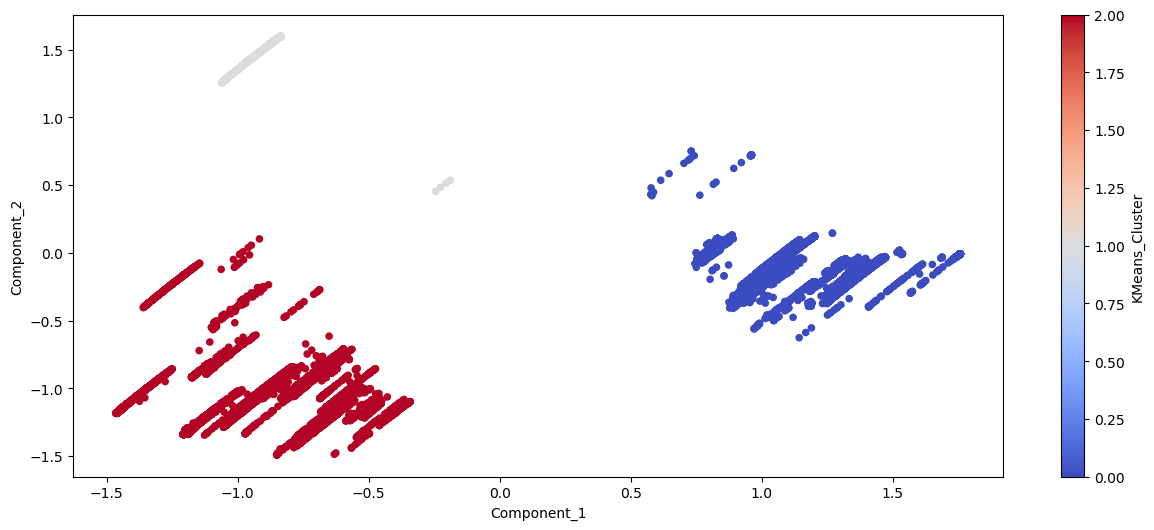

In [68]:
pca_nombres.plot.scatter(x='Component_1', y='Component_2', c='KMeans_Cluster',cmap='coolwarm', figsize=(15, 6))

In [69]:
px.scatter(pca_nombres, x="Component_1", y="Component_2", color="KMeans_Cluster", color_continuous_scale=px.colors.sequential.Viridis)